# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [78]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
import os
from rdkit import Chem
from standardiser import standardise
from smiles_processing import standardise_smiles
from smiles_processing import smile_to_inchikey

from rdkit import RDLogger
import logging

# Disable warning messages
logging.getLogger("standardiser.standardise").setLevel(logging.ERROR)
RDLogger.DisableLog('rdApp.error')
RDLogger.DisableLog('rdApp.warning')

DATAPATH = "../data"

In [49]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
df = pd.read_csv(os.path.join(DATAPATH, "reference_library.csv"))
df

,smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...
...,...
995,CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...
996,CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O
997,O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...
998,CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...


In [50]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

st_smiles = standardise_smiles(df["smiles"].tolist())
st_smiles

['CCCCNC(=S)N/N=C/c1sccc1C',
 'Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1',
 'O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl',
 'O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1',
 'CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1',
 'Cn1c(=O)c2c(nc(N3CCC[C@@H](N)C3)n2Cc2cc(F)ccc2Cl)c2ccc(C(=O)O)cc21',
 'CNC(=O)c1cccc2c1nc(-c1ccccc1O)n2Cc1ccccc1',
 'C[C@]12CCC3C(CC[C@@H]4C[C@@H](S)CC[C@]34C)C1=CC[C@@H]2C1=CC(=O)OC1',
 'CC1=C(C(=O)OCc2ccccc2)C(c2ccc(-c3ccccc3C)cc2)NC(=S)N1CCCCCc1nnn[nH]1',
 'CC(C)Cc1cc(C(=O)NCc2cccnc2)no1',
 'COC(=O)CC1NN=C2N(CCN2c2ccc(Cl)cc2)C1=O',
 'CCN1c2ncc(COc3cccc(C(=O)O)c3)cc2C(=O)N(C)c2ccc(Cl)nc21',
 'Cc1c(NC(=S)N/N=C\\c2ccccc2O)c(=O)n(-c2ccccc2)n1C',
 'C[C@@H](O)c1nc(-c2nc(-c3nc(CO)cs3)cs2)cs1',
 'CCCCCCCCCCCC(=O)CCCC',
 'C=Cc1c(N)ncnc1N1CCC(c2nc(-c3ccc(C(F)(F)F)c(F)c3)cn2CCN2CCCC2)CC1',
 'O=C1/C(=N/c2ccc(O)cc2)C(Cl)C(=O)c2ccccc21',
 'O=C(O)CC[C@H](NC(=O)c1cccc(-c2ccccc2)n1)C(=O)N1CCN(C(=O)OCCCC(F)(F)F)CC1',
 'CC(=O)Nc1c2c(nn1-c1ccccc1)C[S+]([O-])C2',
 'O=C(O)CSC(C(=O)Nc1ccc(Cl)cc

In [51]:
df["st_smiles"]=st_smiles

In [52]:
print(df.shape)


(1000, 2)


In [53]:
df

,smiles,st_smiles
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1
...,...,...
995,CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21
996,CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O
997,O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...
998,CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13


In [54]:
df.dropna(subset = ["st_smiles"], inplace=True)

In [55]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

inchi_key = df['st_smiles'].apply(smile_to_inchikey)

In [56]:
inchi_key

0      SUTWUYBMBWPLMW-MDWZMJQESA-N
1      RIYHJWOTNJXDLV-UHFFFAOYSA-N
2      OGNBARHGQVMGGX-UHFFFAOYSA-N
3      WQEXDIRUOYNDCM-UHFFFAOYSA-N
4      YEGVLLQDOGYWDQ-OAHLLOKOSA-N
                  ...             
995    RGKVPYQYBUAAEH-UHFFFAOYSA-N
996    VTRFEMUYHTXFEQ-UHFFFAOYSA-N
997    QDFOYTHIYBSDPW-RGAOVNQFSA-N
998    YZQZXLROYFNFQE-QTGUNEKASA-N
999    PRGIOMDFWSHPTC-QPEQYQDCSA-N
Name: st_smiles, Length: 997, dtype: object

In [57]:
df["Inchi_key"] = inchi_key

In [58]:
df

,smiles,st_smiles,Inchi_key
0,CCCCNC(=S)N/N=C/C1=C(C)C=CS1,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N
...,...,...,...
995,CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,RGKVPYQYBUAAEH-UHFFFAOYSA-N
996,CN(CC1=CC=CC2=CC=CC=C12)CN1N=C(C2=CC=NC=C2)OC1=O,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,VTRFEMUYHTXFEQ-UHFFFAOYSA-N
997,O=C(N[C@@H](CSCC1=CC=CC=C1)C(=O)NC1=CC=C(C2S/C...,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,QDFOYTHIYBSDPW-RGAOVNQFSA-N
998,CN1CC[C@]23CCCC[C@H]2[C@H]1CC1=CC=C(OC2=CC=CC=...,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,YZQZXLROYFNFQE-QTGUNEKASA-N


In [59]:
df.drop(columns="smiles", inplace=True)

In [60]:
df

,st_smiles,Inchi_key
0,CCCCNC(=S)N/N=C/c1sccc1C,SUTWUYBMBWPLMW-MDWZMJQESA-N
1,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,RIYHJWOTNJXDLV-UHFFFAOYSA-N
2,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,OGNBARHGQVMGGX-UHFFFAOYSA-N
3,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,WQEXDIRUOYNDCM-UHFFFAOYSA-N
4,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,YEGVLLQDOGYWDQ-OAHLLOKOSA-N
...,...,...
995,CCCn1c(-c2cnc(Nc3ccc(C)nc3)c(Cl)c2)nc2cccc(Cl)c21,RGKVPYQYBUAAEH-UHFFFAOYSA-N
996,CN(Cc1cccc2ccccc12)Cn1nc(-c2ccncc2)oc1=O,VTRFEMUYHTXFEQ-UHFFFAOYSA-N
997,O=C(N[C@@H](CSCc1ccccc1)C(=O)Nc1ccc(C2S/C(=N\c...,QDFOYTHIYBSDPW-RGAOVNQFSA-N
998,CN1CC[C@]23CCCC[C@H]2[C@H]1Cc1ccc(Oc2ccccc2F)cc13,YZQZXLROYFNFQE-QTGUNEKASA-N


In [61]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder
df.to_csv(os.path.join(DATAPATH, "standard_smiles.csv"), index=False)

# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [76]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder
predictions = pd.read_csv(os.path.join(DATAPATH, "eos4tcc_output.csv"))

In [77]:
predictions.head()

,key,input,score,alea,epis
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,0.423020,0.235039,0.009035
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1,0.418839,0.232948,0.010465
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl,0.421575,0.233804,0.010046
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1,0.413913,0.233834,0.008755
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1,0.418600,0.236546,0.006828


In [85]:
top_10_score = predictions.nlargest(10, 'score')
print(top_10_score)

                             key  \
676  DLZIJJOVXGIHAK-UHFFFAOYSA-N   
692  QORKFWILWPYIJT-CLOONOSVSA-N   
671  BQQUXECVVCRHDK-UHFFFAOYSA-N   
686  LAWZRWFMAAIMKC-QWAKEFERSA-N   
693  YYUNYJZUIDSHML-AATRIKPKSA-N   
694  XVZRRPTWUCAMMV-UHFFFAOYSA-N   
688  MJHMABNIGSEYKN-UHFFFAOYSA-N   
681  HGNMYGRBKGXPFK-JWFWCLOMSA-N   
667  VBCRJDNMBJIINH-WUXNSVGLSA-N   
672  WPQIUQXWDUZDBI-UHFFFAOYSA-N   

                                                 input     score      alea  \
676  Cc1cc(OCC(C)(C)C(=O)O)ncc1-c1ccc(-c2nc(C(F)(F)...  0.873109  0.109060   
692  CCOC(=O)[C@@]1(Cc2ccc(OCc3cc(C)nc4ccccc34)c(F)...  0.872298  0.108883   
671  Cc1ccc(S(=O)(=O)N2N=C(C(F)(F)F)CC2c2ccc3c(c2)O...  0.872162  0.109000   
686  Cc1ccc(S(=O)(=O)N2CCC(C(=O)N[C@H](C(=O)NCC3CCC...  0.869108  0.111235   
693  COc1ccc2[nH]cc(C(=O)NC/C=C/CN3CCN(c4ccccc4OC)C...  0.868752  0.111850   
694               Cc1nc(CN2CC(S(=O)(=O)NC3CCCC3)C2)no1  0.868258  0.112295   
688                      O=C(CSc1ncccc1C(=O)O)c1ccccc1  0

In [86]:
top_10_df = pd.DataFrame(top_10_score)
top_10_df

,key,input,score,alea,epis
676,DLZIJJOVXGIHAK-UHFFFAOYSA-N,Cc1cc(OCC(C)(C)C(=O)O)ncc1-c1ccc(-c2nc(C(F)(F)...,0.873109,0.109060,0.001729
692,QORKFWILWPYIJT-CLOONOSVSA-N,CCOC(=O)[C@@]1(Cc2ccc(OCc3cc(C)nc4ccccc34)c(F)...,0.872298,0.108883,0.002511
671,BQQUXECVVCRHDK-UHFFFAOYSA-N,Cc1ccc(S(=O)(=O)N2N=C(C(F)(F)F)CC2c2ccc3c(c2)O...,0.872162,0.109000,0.002495
686,LAWZRWFMAAIMKC-QWAKEFERSA-N,Cc1ccc(S(=O)(=O)N2CCC(C(=O)N[C@H](C(=O)NCC3CCC...,0.869108,0.111235,0.002525
693,YYUNYJZUIDSHML-AATRIKPKSA-N,COc1ccc2[nH]cc(C(=O)NC/C=C/CN3CCN(c4ccccc4OC)C...,0.868752,0.111850,0.002172
694,XVZRRPTWUCAMMV-UHFFFAOYSA-N,Cc1nc(CN2CC(S(=O)(=O)NC3CCCC3)C2)no1,0.868258,0.112295,0.002091
688,MJHMABNIGSEYKN-UHFFFAOYSA-N,O=C(CSc1ncccc1C(=O)O)c1ccccc1,0.868088,0.112232,0.002279
681,HGNMYGRBKGXPFK-JWFWCLOMSA-N,COC(=O)C1[C@@H](c2ccc(-c3ccccc3)cc2)CC2CC[C@H]...,0.866544,0.112577,0.003068
667,VBCRJDNMBJIINH-WUXNSVGLSA-N,CCC(=O)OC(OP(=O)(OC(OC(=O)CC)C(C)C)C(CCC/C=C(\...,0.866317,0.113303,0.002509
672,WPQIUQXWDUZDBI-UHFFFAOYSA-N,O=C(O)c1ccc(NC(=O)c2ccc(C(=O)O)cc2)cc1,0.865554,0.113438,0.002933


C:\Users\bisol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


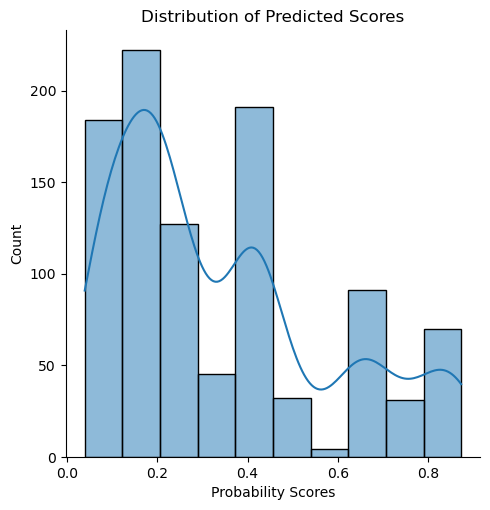

In [104]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values
fig = sns.displot(predictions, x="score", kde=True, bins=10)
plt.xlabel("Probability Scores")
plt.title("Distribution of Predicted Scores")
plt.show();

In [105]:
output_directory = "../Figures"

In [109]:
fig.savefig(os.path.join(output_directory, 'Distribution of Predicted Scores.png'))

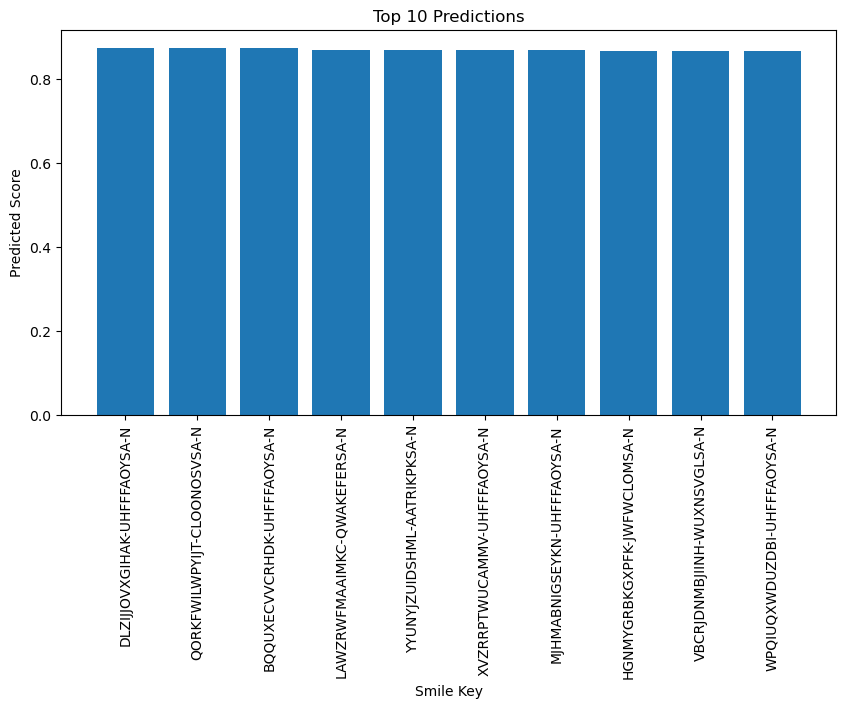

In [110]:
fig2 = plt.figure(figsize=(10, 5))
plt.bar(top_10_df["key"], top_10_df["score"])
plt.xlabel("Smile Key")
plt.ylabel("Predicted Score")
plt.title("Top 10 Predictions")
plt.xticks(rotation=90)
plt.show()

In [111]:
fig2.savefig(os.path.join(output_directory, 'Top 10 Prediction Scores.png'))

The distribution of the probability scores showed that majority of the distribution falls below 0.5 probability score, that is the smile molecules with strong prediction for hERG is less than those without. This shows the ability of the model to predict from input distinguish characteristics that showed strong hERG inhibition. This distribution showed that model can recognize hERG patterns through the vast chemical space. The top 10 score showed input with top 10 probability scores with their corresponding keys. The input with key "DLZIJJOVXGIHAK-UHFFFAOYSA-N" has the highest predicted probability score of 0.87.